Que 1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
- K-Means is an iterative, fast, and scalable centroid-based algorithm requiring the number of clusters (K) to be defined beforehand, making it ideal for large, spherical, and flat data sets. Hierarchical Clustering builds a nested, tree-like, hierarchical structure (dendrogram) without needing a predefined (K), making it suitable for interpreting relationships in smaller datasets.

- **Use Cases:**
    - **K-Means:** Customer Segmentation. A company with millions of customers uses K-Means to identify 5 distinct purchasing behavioral groups (based on income and spend score) for targeted marketing.
    - **Hierarchical Clustering:** Document/Taxonomy Clustering. A researcher uses HCA to organize a collection of documents or biological species into a hierarchical, tree-like structure (dendrogram) to understand the nested, evolutionary, or topic-based relationships between them.

Que 2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
- The Silhouette Score evaluates clustering algorithms by measuring how well-separated and cohesive clusters are, with values ranging from -1 to +1. A score near +1 indicates well-defined, distinct clusters, while 0 suggests overlapping clusters and -1 suggests misclassified data, providing a quantitative metric for optimal cluster number selection.

- **Key Purposes of the Silhouette Score:**
    - **Evaluating Cluster Quality:** It measures the similarity of a data point to its own cluster (cohesion) compared to other clusters (separation).
    - **Determining Optimal Clusters:** It helps determine the ideal number of clusters (K) for algorithms like K-Means.
    - **Performance Comparison:** It is used to compare the performance of different clustering algorithms on the same dataset.

Que 3. What are the core parameters of DBSCAN, and how do they influence the clustering process?
- The core parameters of DBSCAN are Epsilon and MinPts (minimum points), which define cluster density and shape. Epsilon defines the radius of the neighborhood around a point. It represents the maximum distance between two samples for them to be considered as neighbors, while MinPts determines the minimum points required to form a dense region, influencing how many clusters are found and how noise is handled.

- **Influence on the Clustering Process :** These parameters directly dictate the density threshold for forming clusters.
    - **Influence of Epsilon (Radius) :**
        - **Too Small:** A small epsilon value results in many points being classified as noise because they fail to meet the density requirement within that narrow radius.
        - **Too Large:** A large epsilon value causes different clusters to merge into one, and most points may be classified as part of a single, large cluster.
    - **Influence of MinPts (Density Threshold) :**
        - **Small Value:** A small min_samples value makes the algorithm more sensitive to noise, potentially creating many small, fragmented clusters.
        - **Large Value:** A higher min_samples value requires a much higher density to form clusters, leading to stricter requirements and potentially classifying denser, fewer clusters while treating more moderate-density regions as noise.

Que 4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
- Feature scaling is essential for K-Means and DBSCAN because these algorithms rely on distance metrics (e.g., Euclidean distance) to measure similarity. Without scaling, features with larger magnitudes or ranges dominate the distance calculations, resulting in biased, inaccurate clusters that ignore important, smaller-range variables.

- **Equalizes Feature Influence:** Scaling ensures all features contribute equally to the distance computation, rather than letting variables with high magnitudes (e.g., salary in thousands) overwhelm features with small magnitudes (e.g., age).
- **Prevents Misleading Clusters:** For example, in a dataset with height and weight, unscaled data might lead to clusters based solely on weight, as it has a higher numerical range.
- **Improves Convergence Speed:** For K-Means, normalized data helps the optimization process reach convergence faster.
- **DBSCAN Density Definition:** Because DBSCAN uses distance to define density within a specific radius (epsilon), scaled features ensure that the neighborhood density is calculated consistently across all dimensions.

Que 5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
- The Elbow Method is a graphical technique for finding the optimal number of clusters (K) in K-Means clustering by plotting the "Within-Cluster Sum of Squares" (WCSS) against the number of clusters. It helps determine the optimal \(K\) by identifying the "elbow" point—where the rate of decrease in WCSS sharply slows down, balancing model performance with complexity.

- **Key Aspects of the Elbow Method:**
    - **Objective:** To find the \(K\) value that minimizes the distance between data points and their respective cluster centroids (variance) while avoiding overfitting.
    - **WCSS Calculation:** For a range of \(K\) values (e.g., 1 to 10), the algorithm calculates the sum of squared distances between each point and its centroid.
    - **Identifying the "Elbow":** As \(K\) increases, WCSS decreases. The plot typically looks like an arm, and the "elbow" is the point of inflection where adding another cluster provides diminishing returns in reducing variance.
    - **Optimal Cluster Selection:** The point on the plot where the curve bends (the "elbow") represents the optimal number of clusters, as further increasing \(K\) does not significantly improve the fit.

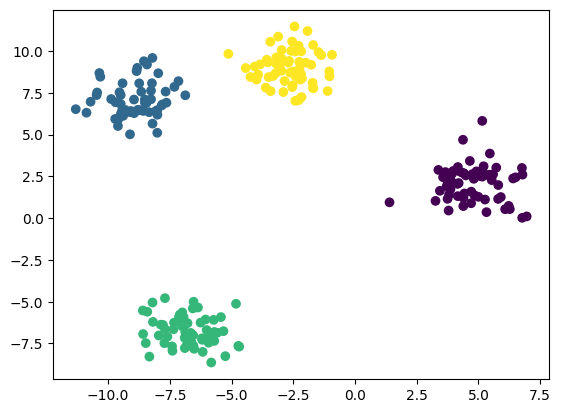

In [12]:
# Que 6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
# apply KMeans clustering, and visualize the results with cluster centers.

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
y_label = kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_label)

In [23]:
# Que 7. Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model.
# Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
dbscan.fit(X_scaled)

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Cluster labels: {labels}")

Number of clusters found (excluding noise): 0
Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


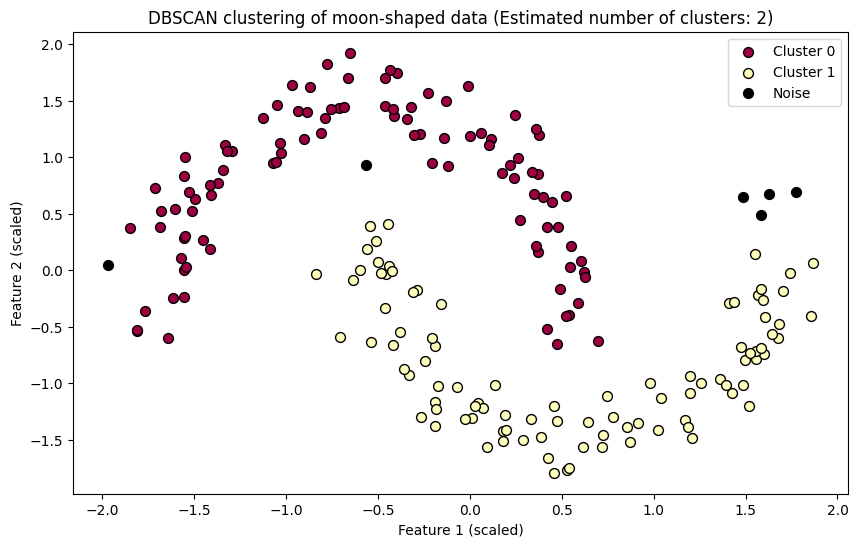

In [27]:
# Que 8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1),
# apply DBSCAN, and highlight the outliers in the plot.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

plt.figure(figsize=(10, 6))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolors='k', s=50, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title(f'DBSCAN clustering of moon-shaped data (Estimated number of clusters: {n_clusters_})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

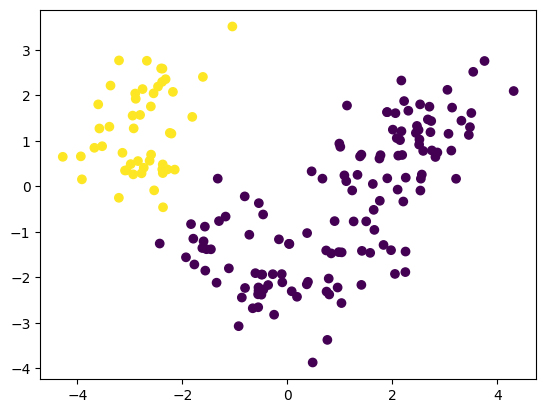

In [29]:
# Que 9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering
# and visualize the result in 2D with a scatter plot.

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

wine = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)

cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(pca_scaled)
cluster.labels_
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.  
Describe your real-world data science workflow using clustering:
1. Which clustering algorithm(s) would you use and why?
2. How would you preprocess the data (missing values, scaling)?
3. How would you determine the number of clusters?
4. How would the marketing team benefit from your clustering analysis?

**Answer**
- **1. Clustering Algorithms and Reasons**
    - **K-Means Clustering:** Preferred for its computational efficiency on large, numeric datasets to segment customers into \(K\) distinct clusters.
    - **Alternative: Hierarchical Clustering:** Used on a smaller subset of data to generate a dendrogram to understand the structure and help validate the optimal number of clusters.
    - **Reasoning:** The goal is to maximize intra-cluster similarity (similar purchasing behavior) and inter-cluster difference (distinctly different behaviors) for personalized marketing.
- **2. Data Preprocessing Workflow**
    - **Handling Missing Values:** I would impute missing numerical values (e.g., age) with the median and remove rows where critical behavioral data is missing.
    - **Feature Engineering:** Create behavioral metrics, such as total spend, average order value, frequency of purchase, and diversity of product categories.
    - **Scaling:** As K-Means relies on distance calculations (Euclidean distance), I will use StandardScaler (z-score normalization) to ensure features like 'Total Spend' do not dominate 'Frequency' due to scale.
    - **Categorical Encoding:** Convert demographic categorical variables (e.g., gender, region) using one-hot encoding.
- **3. Determining the Number of Clusters**
    - **Elbow Method:** I will plot the Sum of Squared Errors (SSE) against the number of clusters (K) and look for the "elbow" point where the rate of decrease in SSE slows down.
    - **Silhouette Score:** I will calculate silhouette scores for various \(K\) values, aiming for a value closer to 1, which indicates well-separated clusters.
    - **Business Interpretation:** Finally, I would ensure the chosen \(K\) results in actionable segments that make intuitive business sense (e.g., \(K=4\) or \(K=5\)).
- **4. Benefits to the Marketing Team**
    - **Targeted Promotions:** Instead of generic campaigns, marketing can send tailored offers (e.g., high-end brand ads to "VIP" shoppers vs. discount coupons to "Price Sensitive" users).
    - **Improved ROI:** Marketing spend is optimized by targeting high-likelihood-to-convert segments.
    - **Churn Prevention:** Identifying clusters with decreasing purchase frequency allows for proactive "win-back" campaigns, such as special offers for inactive users.
    - **Personalization:** Understanding the specific product categories preferred by each cluster enables personalized product recommendations.